In [0]:
!git clone https://github.com/sonsharma/New-York-Citi-Bike-Data-Analysis.git
%cd New-York-Citi-Bike-Data-Analysis/

Cloning into 'New-York-Citi-Bike-Data-Analysis'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 257 (delta 30), reused 19 (delta 1), pack-reused 132
Receiving objects: 100% (257/257), 13.19 MiB | 25.78 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/New-York-Citi-Bike-Data-Analysis


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sys, math, os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
sys.path.append("..")
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline
sns.set(style='ticks', palette='Set2')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_path_1 = "./Data/Citi Bike/JC-201901-citibike-tripdata.csv"  
data_path_2 = "./Data/Citi Bike/JC-201902-citibike-tripdata.csv"  
data_path_3 = "./Data/Citi Bike/JC-201903-citibike-tripdata.csv"  
data_path_4 = "./Data/Citi Bike/JC-201904-citibike-tripdata.csv"  
data_path_5 = "./Data/Citi Bike/JC-201905-citibike-tripdata.csv"  
data_path_6 = "./Data/Citi Bike/JC-201906-citibike-tripdata.csv"  
data_path_7 = "./Data/Citi Bike/JC-201907-citibike-tripdata.csv"  
data_path_8 = "./Data/Citi Bike/JC-201908-citibike-tripdata.csv"  
data_path_9 = "./Data/Citi Bike/JC-201909-citibike-tripdata.csv"  
data_path_10 = "./Data/Citi Bike/JC-201910-citibike-tripdata.csv"  
data_path_11= "./Data/Citi Bike/JC-201911-citibike-tripdata.csv"  
data_path_12= "./Data/Citi Bike/JC-201912-citibike-tripdata.csv"  

df_1 = pd.read_csv(data_path_1)
df_2 = pd.read_csv(data_path_2)
df_3 = pd.read_csv(data_path_3)
df_4 = pd.read_csv(data_path_4)
df_5 = pd.read_csv(data_path_5)
df_6 = pd.read_csv(data_path_6)
df_7 = pd.read_csv(data_path_7)
df_8 = pd.read_csv(data_path_8)
df_9 = pd.read_csv(data_path_9)
df_10 = pd.read_csv(data_path_10)
df_11 = pd.read_csv(data_path_11)
df_12= pd.read_csv(data_path_12)

# Merge the dataframe

In [0]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12])

# Cleaning the dataframe

In [0]:
#sort df
df.sort_values("tripduration", axis = 0, ascending = True, inplace = True, na_position ='last')

#number of trips under 90 seconds
trip = df.apply(lambda x: True if x['tripduration'] < 91 else False , axis=1)
numOfRows = len(trip[trip == True].index)
percent_del = numOfRows / 404947
print('Number of Rows in dataframe less than 90 seconds : ', numOfRows)
print('Percentage of rows that will be deleted: ', percent_del)

Number of Rows in dataframe less than 90 seconds :  4566
Percentage of rows that will be deleted:  0.01127554963982941


In [0]:
#drop trips that are less than 90 seconds and where start and end stations are the same
df_clean = df.drop(df[(df['tripduration'] < 91)].index)

In [0]:
#number of trips where start and end station are the same
df_dup = df_clean[df_clean['start station id'] == df_clean['end station id']]
print (len(df_dup)/404947) #4%

#look at it against the number of minutes
df_clean = df.drop(df_clean[(df_clean['start station id'] == df_clean['end station id'])].index)

df_clean.info()


0.037755558134768254
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285058 entries, 28807 to 2509
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             285058 non-null  int64  
 1   starttime                285058 non-null  object 
 2   stoptime                 285058 non-null  object 
 3   start station id         285058 non-null  int64  
 4   start station name       285058 non-null  object 
 5   start station latitude   285058 non-null  float64
 6   start station longitude  285058 non-null  float64
 7   end station id           285058 non-null  int64  
 8   end station name         285058 non-null  object 
 9   end station latitude     285058 non-null  float64
 10  end station longitude    285058 non-null  float64
 11  bikeid                   285058 non-null  int64  
 12  usertype                 285058 non-null  object 
 13  birth year               285058 non-

In [0]:
# To be easily remembered, let us still rename the df_clean to df

In [0]:
df= df_clean

In [0]:
#top start stations
#sum up station numbers and see which station has largest numbers of actions
print("The number of unique stations is "+str(df['start station name'].nunique()))
print("\n")

ncount = df.groupby('start station name')['tripduration'].nunique()

#show top 5 stations
print("The five most popular start stations are: "+str(ncount.nlargest(5)))

#make there's no blank values for stations

The number of unique stations is 53


The five most popular start stations are: start station name
Grove St PATH         1919
Newport Pkwy          1853
Newport PATH          1779
Harborside            1717
Liberty Light Rail    1628
Name: tripduration, dtype: int64


In [0]:
#top end stations
print("The number of unique stations is "+str(df['end station name'].nunique()))
print("\n")

ncount = df.groupby('end station name')['tripduration'].nunique()

#show top 5 stations
print("The five most popular end stations are: "+str(ncount.nlargest(5)))

The number of unique stations is 106


The five most popular end stations are: end station name
Newport Pkwy          1911
Grove St PATH         1876
Liberty Light Rail    1796
Newport PATH          1758
Harborside            1630
Name: tripduration, dtype: int64


# Data Preparation - Creating Columns 

In [0]:
df['date'] = df['starttime'].apply(lambda x:x.split(' ')[0]) #Create 'date' column

In [0]:
df["hour"] = df['starttime'].apply(lambda x: x.split()[1].split(":")[0]) # Create 'hour' Column

In [0]:
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d')).dt.weekday # Create 'day' column: the value of da is from 0 to 6: Mon - Sun

In [0]:
df['month'] = df['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.month # Create 'month' column

In [0]:
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d') # Change the format to datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime']= pd.to_datetime(df['stoptime'])

In [0]:
Isweekend = []
for i in df['date']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df['Isweekend'] = Isweekend # Create one column of Isweekend: 0-Weekday; 1-Weekend

In [0]:
from datetime import date 
import holidays 
  
# Select country - USA and years = 2019
us_holidays = holidays.UnitedStates(years =2019) 
  

IsHoliday = []
for i in df['date']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  

df['IsHoliday'] = IsHoliday #Create one column of Isholiday: 0 - holiday; 1-Not holiday

In [0]:
IsWorkingday = []
for i in range(len(df['Isweekend'])):
    if (df['Isweekend'].iloc[i] == 1) or (df['IsHoliday'].iloc[i] == 1): # Not working Day
      IsWorkingday.append(0)
    else:
      IsWorkingday.append(1)
print(IsWorkingday)



[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 

In [0]:
df['IsWorkingday'] = IsWorkingday

In [0]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,day,month,Isweekend,IsHoliday,IsWorkingday
28807,61,2019-04-29 10:09:12.692,2019-04-29 10:10:14.081,3483,Montgomery St,40.719420,-74.050990,3483,Montgomery St,40.719420,-74.050990,29550,Subscriber,1986,1,2019-04-29,10,0,4,0,0,1
3108,61,2019-03-12 08:27:11.374,2019-03-12 08:28:13.169,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,29539,Subscriber,1987,1,2019-03-12,08,1,3,0,0,1
2475,61,2019-02-10 13:17:09.019,2019-02-10 13:18:10.132,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,26311,Subscriber,1983,1,2019-02-10,13,6,2,1,0,0
13423,61,2019-01-01 20:21:22.696,2019-01-01 20:22:24.351,3270,Jersey & 6th St,40.725289,-74.045572,3272,Jersey & 3rd,40.723332,-74.045953,29497,Subscriber,1976,1,2019-01-01,20,1,1,0,1,0
10886,61,2019-11-10 10:26:52.823,2019-11-10 10:27:54.747,3272,Jersey & 3rd,40.723332,-74.045953,3211,Newark Ave,40.721525,-74.046305,26253,Subscriber,1984,1,2019-11-10,10,6,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,1187550,2019-08-06 04:01:30.190,2019-08-19 21:54:01.037,3679,Bergen Ave,40.722104,-74.071455,3268,Lafayette Park,40.713464,-74.062859,29299,Customer,1969,0,2019-08-06,04,1,8,0,0,1
37899,1195576,2019-06-29 19:45:17.177,2019-07-13 15:51:33.622,3187,Warren St,40.721124,-74.038051,3678,Fairmount Ave,40.725726,-74.071959,29437,Customer,1969,0,2019-06-29,19,5,6,1,0,0
47249,1431964,2019-08-30 20:08:37.959,2019-09-16 09:54:42.836,3192,Liberty Light Rail,40.711242,-74.055701,3540,Morningside Ave & W 123 St,40.810000,-73.955151,29459,Customer,1969,0,2019-08-30,20,4,8,0,0,1
25562,1729020,2019-05-22 14:30:42.271,2019-06-11 14:47:43.268,3192,Liberty Light Rail,40.711242,-74.055701,3426,JCBS Depot,40.709651,-74.068601,29252,Customer,1969,0,2019-05-22,14,2,5,0,0,1


# Weekend vs Weekday Usage Analysis



In [0]:
df_Isweekend = df.groupby(['Isweekend']).count()
print(df_Isweekend['date'])

Isweekend
0    221944
1     63114
Name: date, dtype: int64


In [0]:
df_day = df.groupby(['day']).count()
print(df_day['date'])

day
0    41788
1    45413
2    46120
3    43333
4    45290
5    34572
6    28542
Name: date, dtype: int64


In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'The total number of trips')

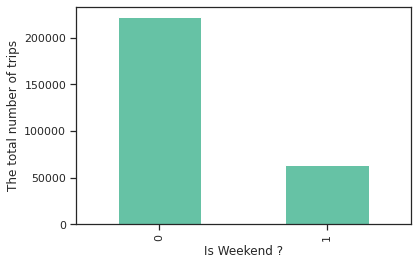

In [0]:
df_Isweekend['date'].plot(kind='bar') 
plt.xlabel('Is Weekend ?')
plt.ylabel('The total number of trips')

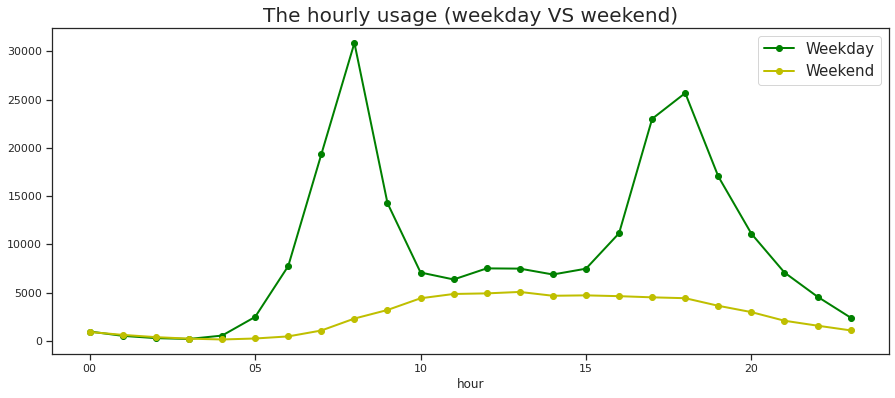

In [0]:
plt.figure(figsize=(15,6))
df[df['Isweekend']==0].groupby('hour').count()['bikeid'].plot(linestyle = '-',
                                                            linewidth = 2,
                                                            color = 'g',marker = 'o')
df[df['Isweekend']==1].groupby('hour').count()['bikeid'].plot(linestyle = '-',
                                                            linewidth = 2,
                                                            color = 'y',marker = 'o')
plt.legend(['Weekday','Weekend'],fontsize=15)
plt.title('The hourly usage (weekday VS weekend)',fontsize=20)
plt.show()

1. On weekdays, the bicycle usage has two peaks at 8 to 9 a.m. and 17:00 - 18:00 in the evening, which is the period of commuting, and it is in line with common sense. There is also a small increase at about 12 noon. It is speculated that it may be eating time.

2. On weekends, there is no peak during the commuting period, and the peak is concentrated at about 13:00, indicating that the bicycle demand at 10-15 is relatively large.

3. It can also be speculated that the target customers of Citi Bike should be the majority of office workers.

# Monthly and Seasonal Usage Analysis

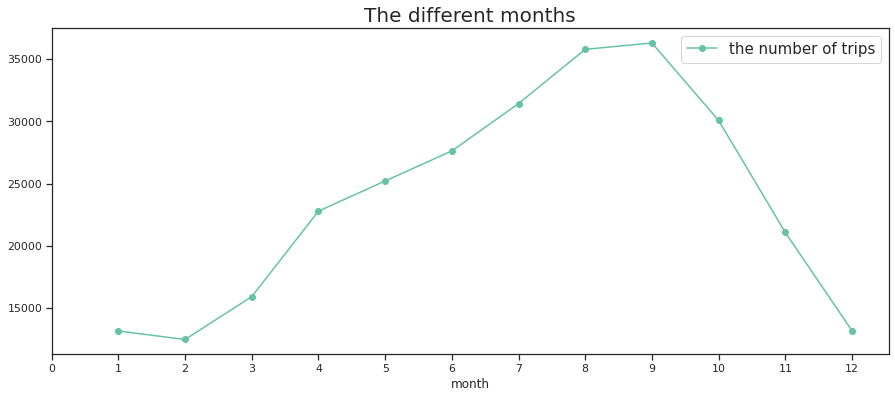

In [0]:
plt.figure(figsize=(15,6))
df.groupby('month').count()['bikeid'].plot(marker='o')
plt.xticks(range(0,13))
plt.title('The different months',fontsize=20)
plt.legend(['the number of trips'],fontsize=15)

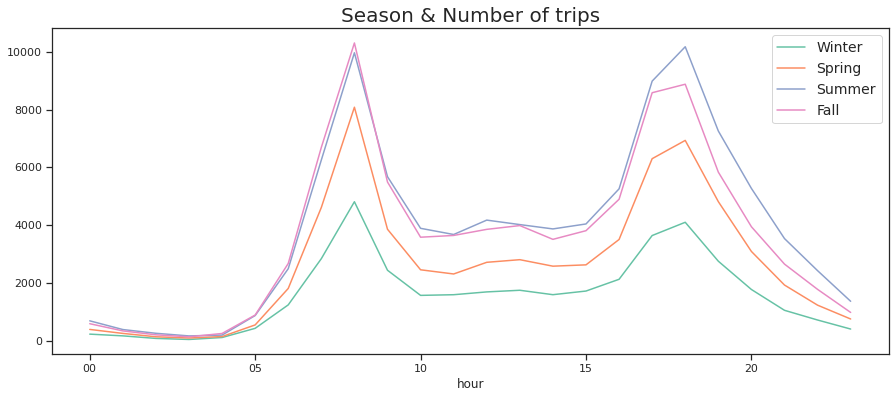

In [0]:
plt.figure(figsize=(15,6))
df[(df['month']== 12)|(df['month']== 1)|(df['month']== 2)].groupby('hour').count()['bikeid'].plot()
df[(df['month']== 3)|(df['month']== 4)|(df['month']== 5)].groupby('hour').count()['bikeid'].plot()
df[(df['month']== 6)|(df['month']== 7)|(df['month']== 8)].groupby('hour').count()['bikeid'].plot()
df[(df['month']== 9)|(df['month']== 10)|(df['month']== 11)].groupby('hour').count()['bikeid'].plot()
plt.legend(['Winter','Spring','Summer','Fall'],fontsize=14)
plt.title('Season & Number of trips',fontsize=20)
plt.show()

Although the month and season is different, but the trend is the same.

# Different Customer Type Usage Analysis

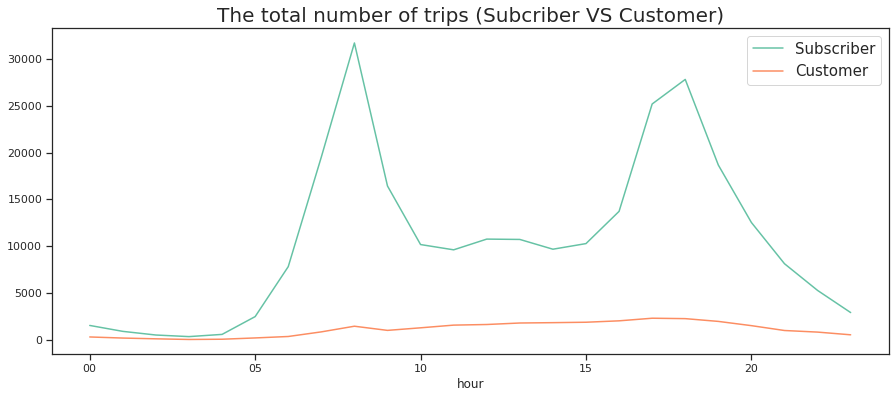

In [0]:
plt.figure(figsize=(15,6))
df[df['usertype']=='Subscriber'].groupby('hour').count()['bikeid'].plot()
df[df['usertype']=='Customer'].groupby('hour').count()['bikeid'].plot()
plt.legend(['Subscriber','Customer'],fontsize = 15)
plt.title('The total number of trips (Subcriber VS Customer)',fontsize=20)
plt.show()

It can be seen that there are two peaks of the subscriber usage but no peak of customers. 

We can conclude that most subscriber used bicycle for commuting.

# Gender Usage Analysis

In [0]:
df_gender = df.groupby(['gender']).count()
print(df_gender['date'])

gender
0     26402
1    286406
2     92139
Name: date, dtype: int64


Text(0, 0.5, 'Total number of trips')

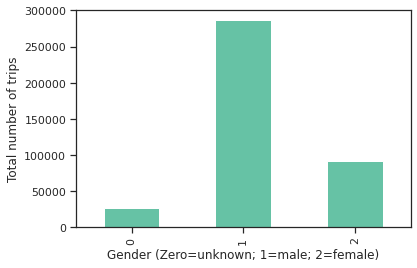

In [0]:
df_gender['date'].plot( kind='bar') 
plt.xlabel('Gender (Zero=unknown; 1=male; 2=female)')
plt.ylabel('Total number of trips')

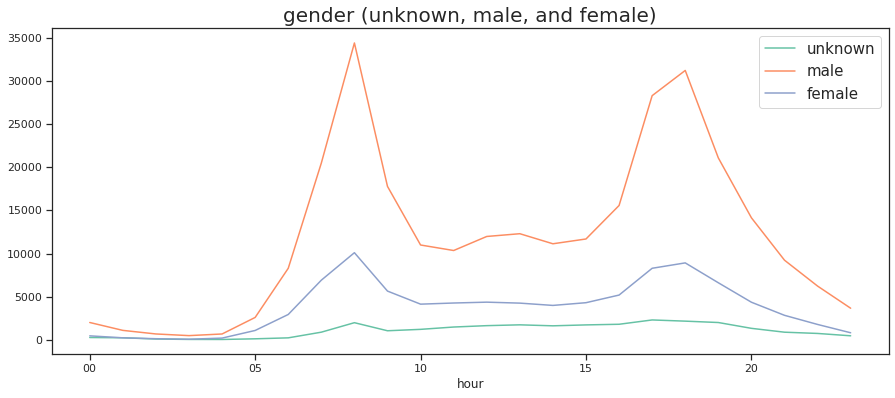

In [0]:
plt.figure(figsize=(15,6))
df[df['gender']==0].groupby('hour').count()['bikeid'].plot()
df[df['gender']==1].groupby('hour').count()['bikeid'].plot()
df[df['gender']==2].groupby('hour').count()['bikeid'].plot()

plt.legend(['unknown','male','female'],fontsize = 15)
plt.title('gender (unknown, male, and female)',fontsize=20)
plt.show()

# Weather and Precipitations Usage Analysis

In [0]:
data_path = "./Data/weather.csv"
df_weather = pd.read_csv(data_path)

#GENERAL DATA PREPARATION
# convert the 'Date' column to datetime format 
df_weather['DATE']= pd.to_datetime(df_weather['DATE']) 
# add calculated column with the average temp = (TMAX + TMIN)/2
df_weather['TEMP'] = (df_weather['TMAX'] + df_weather['TMIN'])/2
# add column that tells us whether the day was cold or warm depending on the threshold
threshold_of_cold = 54
df_weather.loc[df_weather['TEMP'] < threshold_of_cold, 'COLD'] = 'True' 
df_weather.loc[df_weather['TEMP'] >= threshold_of_cold, 'COLD'] = 'False' 
# add column that tells us whether there were precipitations during the day
df_weather['PRECLVL'] = df_weather['PRCP'] + df_weather['SNOW']
df_weather.loc[df_weather['PRECLVL'] > 0, 'PREC'] = 'True' 
df_weather.loc[df_weather['PRECLVL'] == 0, 'PREC'] = 'False' 

# leave only important columns out of 'NAME','DATE', 'TEMP', 'PRCP', 'SNOW', 'PREC', 'COLD'
df_weather = df_weather.loc[:, df_weather.columns.intersection(['NAME','DATE', 'PREC', 'COLD'])]

#LOCATION AND TIME PERIOD
# choose the location
df_w_park =  df_weather['NAME']=='NY CITY CENTRAL PARK, NY US'
# filter rows for 'NY CITY CENTRAL PARK, NY US' using  the boolean variable
df_w = df_weather[df_w_park]
# select the period of time
start_date = '01-01-2019'
end_date = '31-12-2019'
mask = (df_w['DATE'] >= start_date) & (df_w['DATE'] <= end_date)
df_w_period = df_w.loc[mask]

#TEST
df_w_period.loc[90:120]

# df_w_period is the dataframe for the specific LOCATION (NAME) AND TIME PERIOD with features 'NAME'	'DATE'	'COLD'	'PREC'

ERROR! Session/line number was not unique in database. History logging moved to new session 63


,NAME,DATE,COLD,PREC
90,"NY CITY CENTRAL PARK, NY US",2019-04-01,True,False
91,"NY CITY CENTRAL PARK, NY US",2019-04-02,True,False
92,"NY CITY CENTRAL PARK, NY US",2019-04-03,False,False
93,"NY CITY CENTRAL PARK, NY US",2019-04-04,True,False
94,"NY CITY CENTRAL PARK, NY US",2019-04-05,True,True
95,"NY CITY CENTRAL PARK, NY US",2019-04-06,True,False
96,"NY CITY CENTRAL PARK, NY US",2019-04-07,False,False
97,"NY CITY CENTRAL PARK, NY US",2019-04-08,False,True
98,"NY CITY CENTRAL PARK, NY US",2019-04-09,True,True
99,"NY CITY CENTRAL PARK, NY US",2019-04-10,True,False


In [0]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,day,month,Isweekend,IsHoliday,IsWorkingday
28807,61,2019-04-29 10:09:12.692,2019-04-29 10:10:14.081,3483,Montgomery St,40.719420,-74.050990,3483,Montgomery St,40.719420,-74.050990,29550,Subscriber,1986,1,2019-04-29,10,0,4,0,0,1
3108,61,2019-03-12 08:27:11.374,2019-03-12 08:28:13.169,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,29539,Subscriber,1987,1,2019-03-12,08,1,3,0,0,1
2475,61,2019-02-10 13:17:09.019,2019-02-10 13:18:10.132,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,26311,Subscriber,1983,1,2019-02-10,13,6,2,1,0,0
13423,61,2019-01-01 20:21:22.696,2019-01-01 20:22:24.351,3270,Jersey & 6th St,40.725289,-74.045572,3272,Jersey & 3rd,40.723332,-74.045953,29497,Subscriber,1976,1,2019-01-01,20,1,1,0,1,0
10886,61,2019-11-10 10:26:52.823,2019-11-10 10:27:54.747,3272,Jersey & 3rd,40.723332,-74.045953,3211,Newark Ave,40.721525,-74.046305,26253,Subscriber,1984,1,2019-11-10,10,6,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,1187550,2019-08-06 04:01:30.190,2019-08-19 21:54:01.037,3679,Bergen Ave,40.722104,-74.071455,3268,Lafayette Park,40.713464,-74.062859,29299,Customer,1969,0,2019-08-06,04,1,8,0,0,1
37899,1195576,2019-06-29 19:45:17.177,2019-07-13 15:51:33.622,3187,Warren St,40.721124,-74.038051,3678,Fairmount Ave,40.725726,-74.071959,29437,Customer,1969,0,2019-06-29,19,5,6,1,0,0
47249,1431964,2019-08-30 20:08:37.959,2019-09-16 09:54:42.836,3192,Liberty Light Rail,40.711242,-74.055701,3540,Morningside Ave & W 123 St,40.810000,-73.955151,29459,Customer,1969,0,2019-08-30,20,4,8,0,0,1
25562,1729020,2019-05-22 14:30:42.271,2019-06-11 14:47:43.268,3192,Liberty Light Rail,40.711242,-74.055701,3426,JCBS Depot,40.709651,-74.068601,29252,Customer,1969,0,2019-05-22,14,2,5,0,0,1
